##**Nasa Data Mine Project**
Name: Erik Thompson
Date: 7/23/2025
Purpose: Data mine Public Nasa Datasets for potential discovery of life or similar/hospital conditions for life on Earth like planets.
Sources: https://exoplanetarchive.ipac.caltech.edu
https://exoplanetarchive.ipac.caltech.edu/docs/data.html
https://api.nasa.gov
https://catalog.data.gov/organization/nasa-gov
https://earthdata.nasa.gov/
https://astroquery.readthedocs.io/en/latest/

In [ ]:
#Run one time
!pip install pandas

In [2]:
import pandas as pd

In [3]:
# Load local or remote CSV
url = 'https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps&format=csv'
df = pd.read_csv(url)

# Show the first few rows
print(df[['pl_name', 'hostname', 'discoverymethod', 'pl_orbper', 'pl_rade']].head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_3436\2784556707.py:3: DtypeWarning: Columns (65,183,187) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


        pl_name    hostname  discoverymethod    pl_orbper  pl_rade
0    HD 70642 b    HD 70642  Radial Velocity  2124.540000      NaN
1   Kepler-20 d   Kepler-20          Transit    77.611840     2.75
2  Kepler-976 b  Kepler-976          Transit   105.956415     3.81
3  Kepler-188 c  Kepler-188          Transit     5.996537      NaN
4      K2-151 b      K2-151          Transit     3.835376     1.50


In [7]:
# How many exoplanets by discovery method?
methods = df['discoverymethod'].value_counts()
print(methods)

# Basic stats on radius and orbit
print(df[['pl_rade', 'pl_orbper']].describe())

discoverymethod
Transit                          34912
Radial Velocity                   2632
Microlensing                       715
Transit Timing Variations          158
Imaging                            151
Eclipse Timing Variations           24
Orbital Brightness Modulation       21
Pulsar Timing                       13
Astrometry                           5
Pulsation Timing Variations          2
Disk Kinematics                      1
Name: count, dtype: int64
           pl_rade     pl_orbper
count  26675.00000  3.542100e+04
mean       5.42624  1.233085e+04
std       72.35046  2.137213e+06
min        0.27000  9.070629e-02
25%        1.55000  4.411939e+00
50%        2.29000  1.035350e+01
75%        3.23000  2.662950e+01
max     4282.98000  4.020000e+08


Notes: Primary two discovery methods are Transit and Radial Velocity. Transit means the planet passed in front of the star and dip in brightness is used to measure planets. Radial Velocity (Doppler Spectroscopy) is when a planet causes star to wobble and shift star's light due to Doppler effect.

Count 26675 means there are 26,675 exoplanets that have a known radius value. *(rade means radius of porportion of Earth in number of sizes of Earth 1.0 means Earth sized). 3.542e04 means 35,421 exoplanets with known orbit distance. *(Orbper means Orbit period or time in Earth days for orbit of star).

Mean of 5.4 means most exoplanets are much larger than Earth and probably gas giants. Mean of 1.233e04 means average orbital period of 33.8 years, a much longer oribt than stars.

In [ ]:
#Run one time
!pip install matplotlib

In [5]:
import matplotlib.pyplot as plt

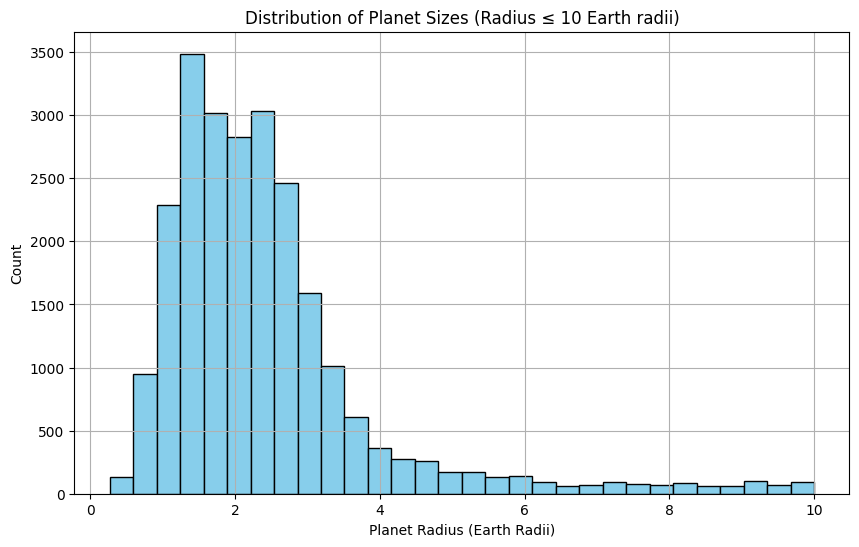

In [6]:
# Select only the columns we need
df_subset = df[['pl_rade', 'pl_orbper']]

# Drop rows with missing or invalid values
df_clean = df_subset.dropna()
# Assuming df is DataFrame with 'pl_rade' column
planet_sizes = df['pl_rade'].dropna()

# Filter to focus on planets with radius <= 10 Earth radii
filtered_sizes = planet_sizes[planet_sizes <= 10]

plt.figure(figsize=(10,6))
plt.hist(filtered_sizes, bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Planet Sizes (Radius ≤ 10 Earth radii)')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

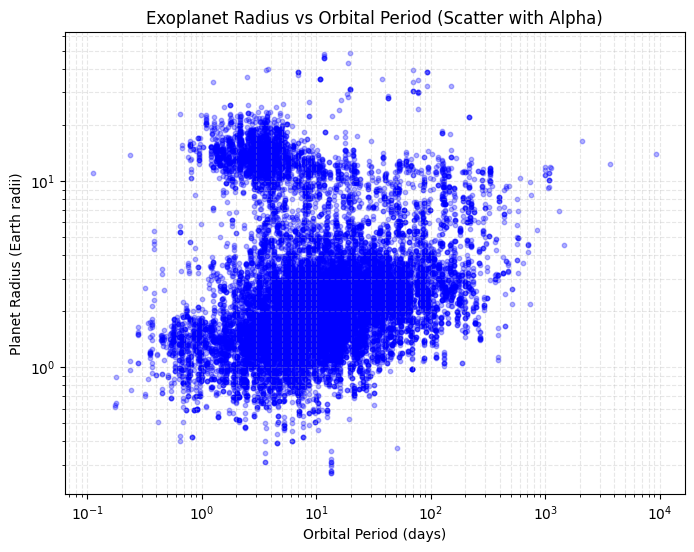

In [7]:

# Filter to positive and reasonably bounded values
df_clean_pos = df_clean[
    (df_clean['pl_orbper'] > 0.1) &  # orbital period > 0.1 days
    (df_clean['pl_orbper'] < 1e4) &  # orbital period < 10,000 days
    (df_clean['pl_rade'] > 0.1) &    # planet radius > 0.1 Earth radii
    (df_clean['pl_rade'] < 50)       # exclude extreme outliers
]
plt.figure(figsize=(8,6))
plt.scatter(
    df_clean_pos['pl_orbper'], df_clean_pos['pl_rade'],
    alpha=0.3, s=10, c='blue'
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Planet Radius (Earth radii)')
plt.title('Exoplanet Radius vs Orbital Period (Scatter with Alpha)')
plt.grid(True, which='both', ls='--', alpha=0.3)
plt.show()

In [9]:
earth_like = df[
    (df['pl_rade'] >= 0.8) & (df['pl_rade'] <= 1.25) &
    (df['pl_orbper'] >= 200) & (df['pl_orbper'] <= 400)
]

print(f"Found {len(earth_like)} Earth-like candidates out of {len(df)}")
print(earth_like[['pl_name', 'hostname', 'pl_rade', 'pl_orbper']])

Found 2 Earth-like candidates out of 38634
            pl_name    hostname  pl_rade   pl_orbper
301    Kepler-452 b  Kepler-452     1.13  384.843022
24795  Kepler-452 b  Kepler-452     1.09  384.847556


Notes: Out of the tens of thousands of discovered exoplanets only one is earth like: Kepler-452 b. This means chance of earth like planet is 1/40,000 exoplanets as an optimistic estimate.



In [19]:
kepler452b = earth_like.iloc[0]
print(f"Kepler-452 b's planet temperature: {kepler452b['pl_eqt']}K\n"
      f"Star temperature: {kepler452b['st_teff']}K\n"
      f"Discovery method: {kepler452b['discoverymethod']}")
def percent_difference(a, b):
    diff = abs(a - b) / ((a + b) / 2) * 100
    return round(diff, 3)
sun_temp = 5778
earth_temp= 255
print(f"\nEarth's planet equilibrium temperature: {earth_temp}K\n"
      f"{percent_difference(kepler452b['pl_eqt'], earth_temp)}% different from Earth\n",
      f"The Sun temperature: {sun_temp}K\n",
      f"{percent_difference(kepler452b['st_teff'], sun_temp)}% different from Earth\n")


Kepler-452 b's planet temperature: 220.0K
Star temperature: 5578.0K
Discovery method: Transit

Earth's planet equilibrium temperature: 255K
14.737% different from Earth
 The Sun temperature: 5778K
 3.522% different from Earth

